In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from random import sample
from statsmodels.stats.power import TTestIndPower, TTestPower
import math
import seaborn as sns
import scipy as sp
import pandas as pd
from matplotlib.lines import Line2D
import random
import statsmodels.api as sm
from itertools import combinations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.stattools import jarque_bera
from itertools import combinations

In [18]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [19]:
# checking original df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [20]:
# checking for nulls
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [21]:
# dropping nulls
df.dropna(inplace=True)

In [22]:
# confirming nulls dropped
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


- categorical based on ints:
    - Bedrooms
    - bathrooms
    - floors
    - 

In [25]:
df.corr()['price'].sort_values(ascending=True)

id              -0.034096
long            -0.022278
lat              0.063430
yr_renovated     0.085023
sqft_lot         0.086550
yr_built         0.095796
floors           0.180589
sqft_basement    0.245005
sqft_garage      0.263674
bedrooms         0.288954
sqft_patio       0.313789
bathrooms        0.480337
sqft_above       0.538631
sqft_living      0.608616
price            1.000000
Name: price, dtype: float64

In [26]:
df_dropped = df.drop(['id', 'address', 'lat', 'long', 'yr_built'], axis = 1)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30111 non-null  object 
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 18  sqft_p

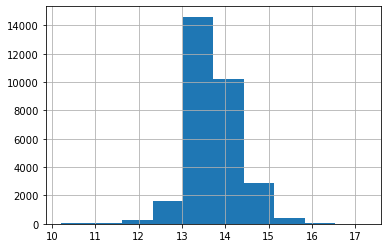

In [134]:
# y_scld = np.log(df_dropped['price'])
# y_scld.hist();

In [136]:
# creating baseline model based on highest .corr() to price (ran above)
X = df_dropped[['sqft_living']]
y = df_dropped['price']
baseline_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:48:03   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Creating basic cat df based on dtype
df_cat = df_dropped.select_dtypes(object)

In [30]:
# viewing cat df
df_cat.head()

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system
0,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC
1,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC
2,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC
3,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC
4,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC


- Drop ID: just a unique identifier, no helpful info
- Drop lat/long and address. Location not important in this analysis
- Drop year built (not able to change year built)


In [31]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          30111 non-null  object
 1   waterfront    30111 non-null  object
 2   greenbelt     30111 non-null  object
 3   nuisance      30111 non-null  object
 4   view          30111 non-null  object
 5   condition     30111 non-null  object
 6   grade         30111 non-null  object
 7   heat_source   30111 non-null  object
 8   sewer_system  30111 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [32]:
# Creating basic numerical df based on dtype
df_numerical = df_dropped.select_dtypes(include=np.number)
df_numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_renovated
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,0
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,0
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,0
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,0
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,0


In [33]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30111 non-null  float64
 1   bedrooms       30111 non-null  int64  
 2   bathrooms      30111 non-null  float64
 3   sqft_living    30111 non-null  int64  
 4   sqft_lot       30111 non-null  int64  
 5   floors         30111 non-null  float64
 6   sqft_above     30111 non-null  int64  
 7   sqft_basement  30111 non-null  int64  
 8   sqft_garage    30111 non-null  int64  
 9   sqft_patio     30111 non-null  int64  
 10  yr_renovated   30111 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 2.8 MB


In [ ]:
# pd.plotting.scatter_matrix(df_numerical, figsize = [20,20]);

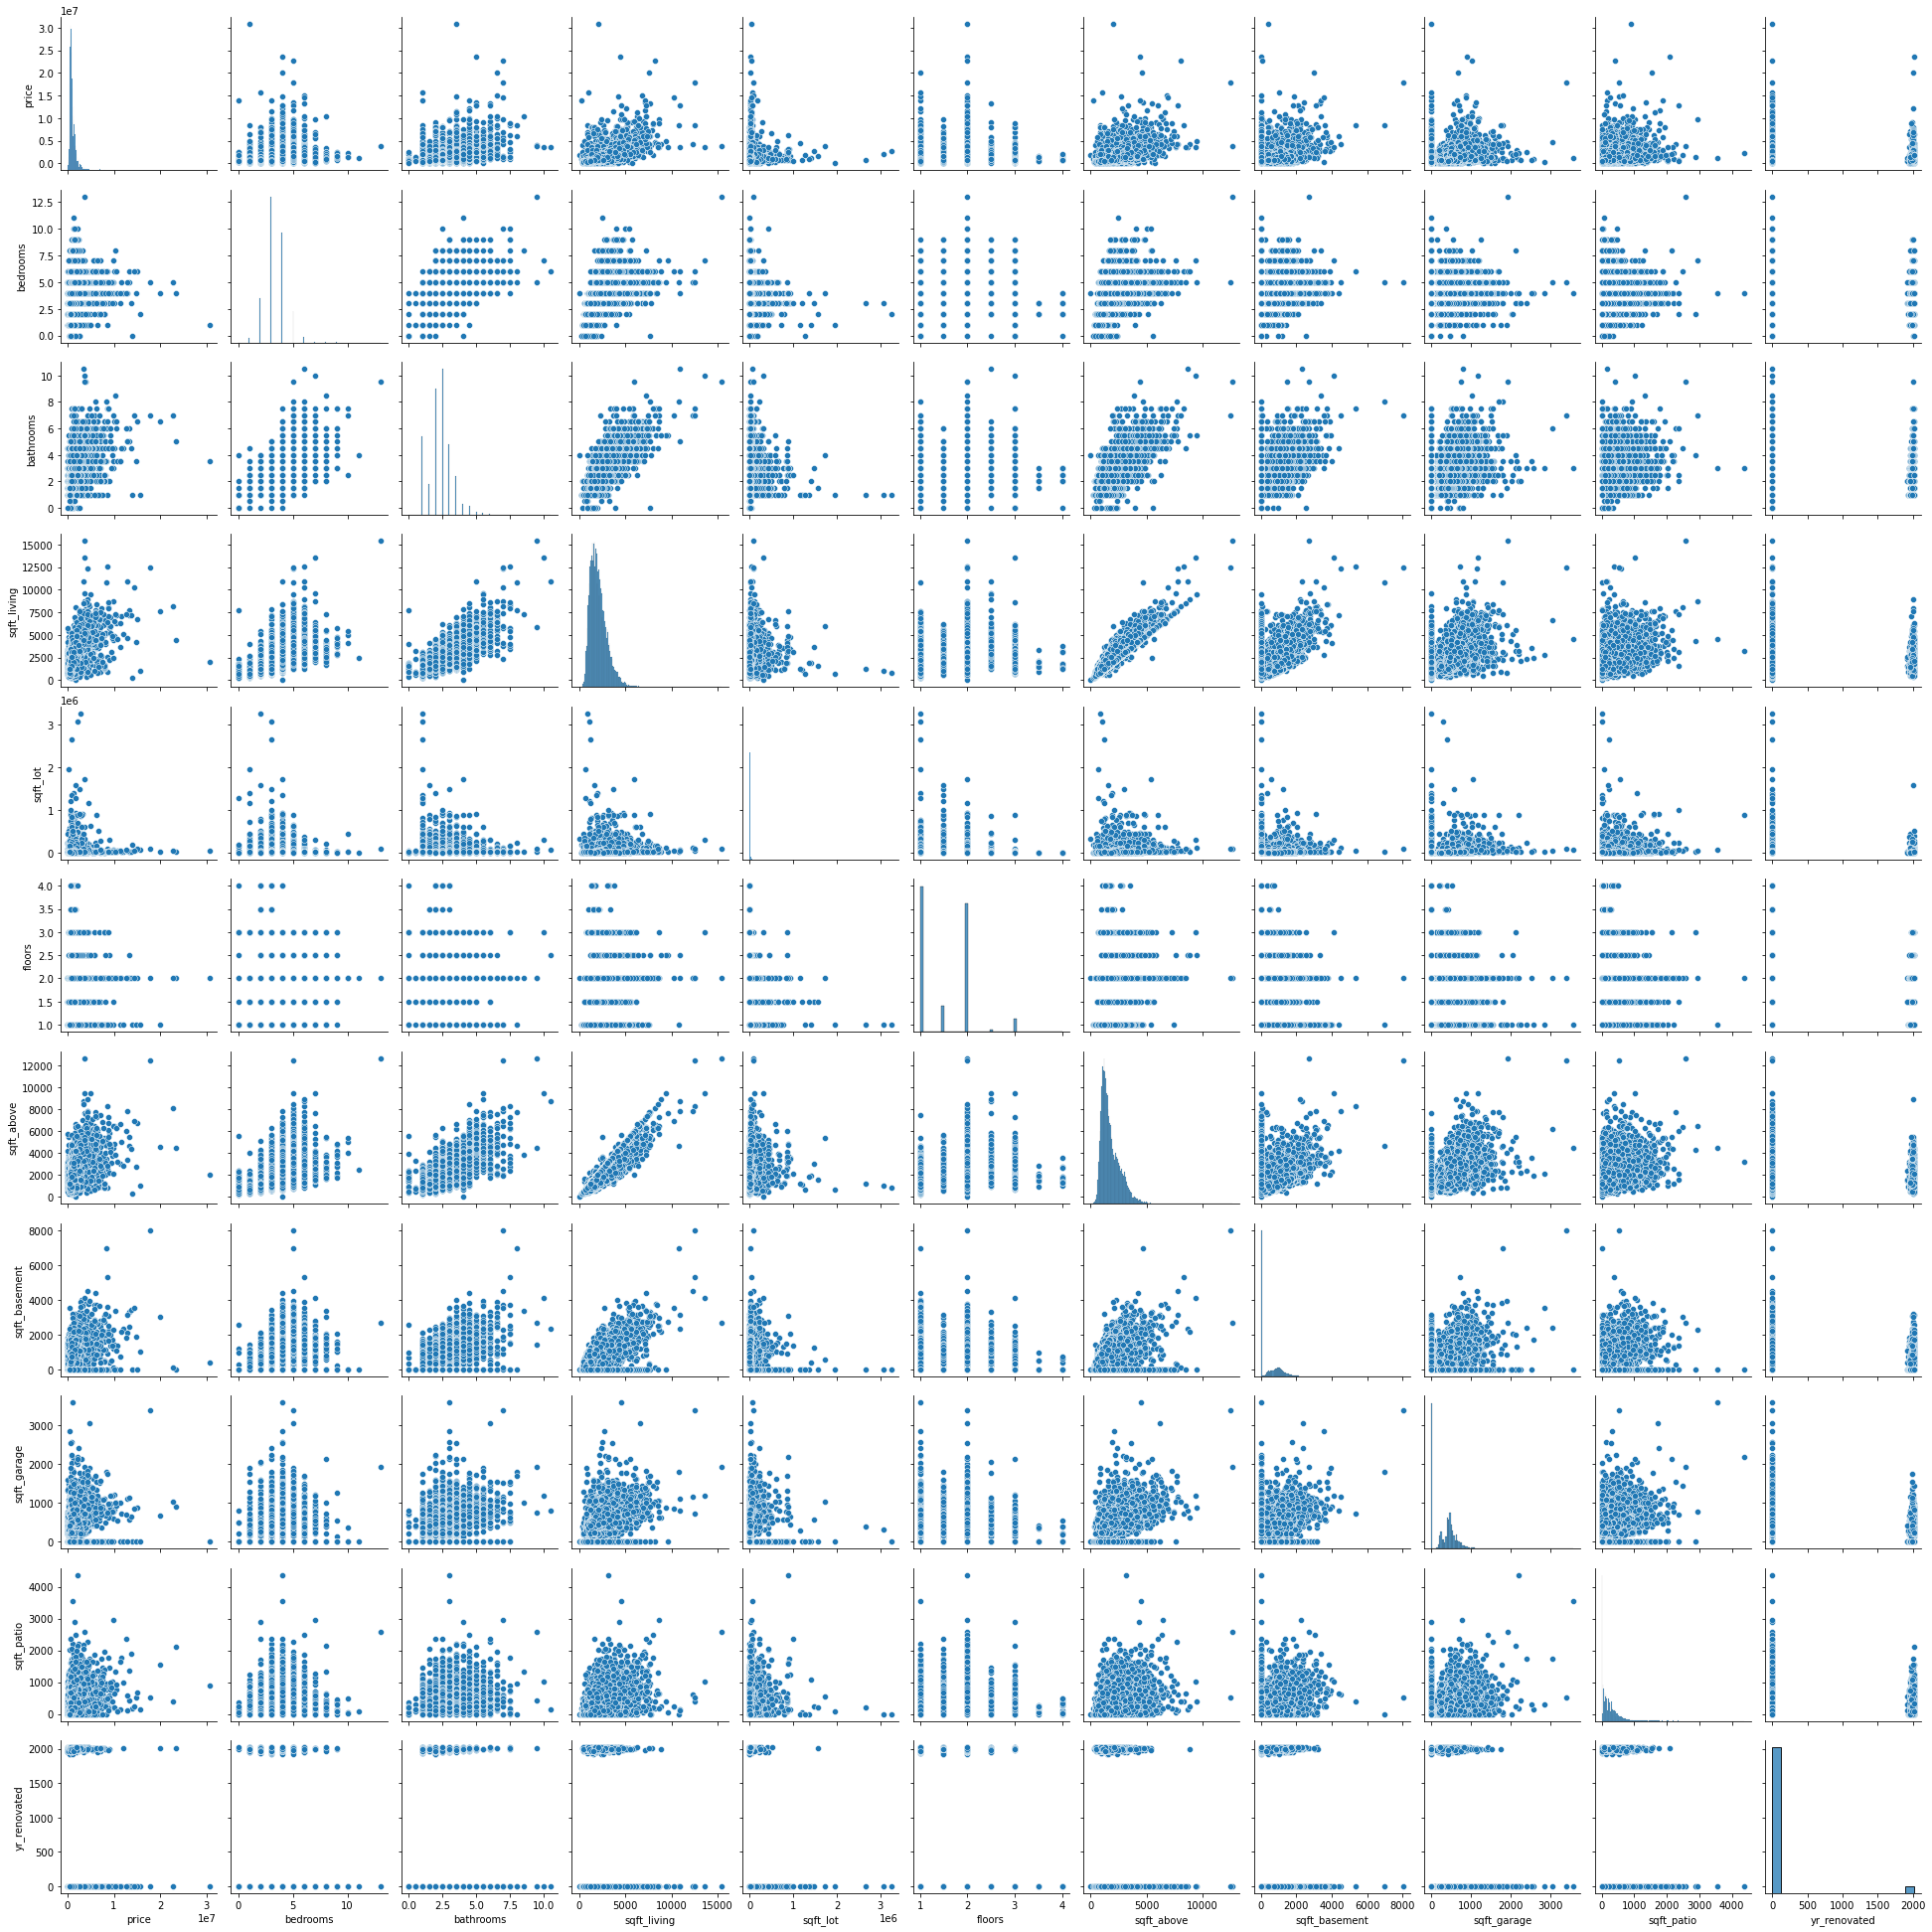

In [40]:
# pairpolt
sns.pairplot(df_numerical);

In [43]:
df_numerical.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
sqft_lot         0.086550
yr_renovated     0.085023
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

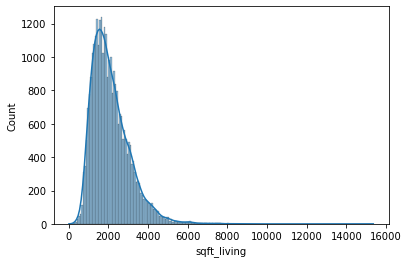

In [139]:
sns.histplot(df_numerical['sqft_living'], kde=True)

In [142]:
# scale price and sqft_living
y_scld = np.log(df_numerical['price'])

y = y_scld
X = df_numerical['sqft_living']

scld_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
scld_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:57:41   Log-Likelihood:                -19063.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30109   BIC:                         3.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9496      0.006   2062.757      0.000      12.937      12.962
sqft_living     0.0004    2.7e-06    137.836      0.000       0.000       0.000
==============================================================================
Omnibus:                     5867.888   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49915.366
Skew:                          -0.700   Prob(JB):                         0.00
Kurtosis:                       9.150   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

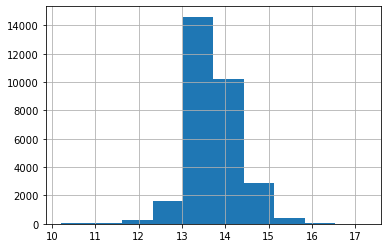

In [137]:
y_scld = np.log(df_numerical['price'])
y_scld.hist();

In [138]:
# creating model with all numerical features
#  df_numerical

y = y_scld
X = df_numerical.drop(['price'], axis = 1)

num_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
num_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     2096.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:49:21   Log-Likelihood:                -18473.
No. Observations:               30111   AIC:                         3.697e+04
Df Residuals:                   30100   BIC:                         3.706e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.9292      0.012   1114.825      0.000      12.906      12.952
bedrooms         -0.0537      0.004    -15.153      0.000      -0.061      -0.047
bathrooms         0.0707      0.005     13.990      0.000       0.061       0.081
sqft_living       0.0002   1.18e-05     15.629      0.000       0.000       0.000
sqft_lot       4.684e-08   4.42e-08      1.061      0.289   -3.97e-08    1.33e-07
floors            0.0335      0.006      5.863      0.000       0.022       0.045
sqft_above        0.0002   1.19e-05     14.374      0.000       0.000       0.000
sqft_basement     0.0002   8.58e-06     17.660      0.000       0.000       0.000
sqft_garage      -0.0001   1.14e-05    -10.069      0.000      -0.000   -9.23e-05
sqft_patio        0.0001   1.17e-05     12.492      0.000       0.000       0.000
yr_renovated   5.847e-05   6.28e-06      9.316      0.000    4.62e-05    7.08e-05
==============================================================================
Omnibus:                     6429.694   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57145.474
Skew:                          -0.777   Prob(JB):                         0.00
Kurtosis:                       9.567   Cond. No.                     2.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


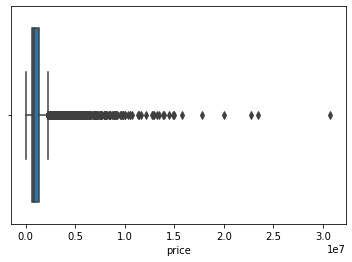

In [54]:
sns.boxplot(df_numerical['price']);

In [69]:
def find_outlier_margin(df_feature):
    feature_sort = df_feature.sort_values()
    q1, q3= np.percentile(feature_sort,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    
    return [lower_bound, upper_bound]

In [72]:
find_outlier_margin(df_numerical['price'])

[-326910.0, 2276146.0]

In [61]:
# get rid off outliers in price
price_no = df_numerical[df_numerical['price'] < 2276146]
price_no

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_renovated
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,0
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,0
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,0
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,0
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,0
...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,0
30151,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,0
30152,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,0
30153,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,0


C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


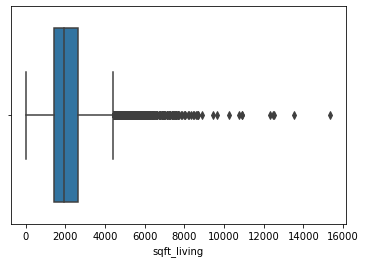

In [62]:
sns.boxplot(df_numerical['sqft_living']);

In [73]:
find_outlier_margin(df_numerical['sqft_living'])

[-380.0, 4420.0]

In [74]:
# get rid off outliers in sqft_living

p_s_no = price_no[price_no['sqft_living'] < 4420]
p_s_no

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_renovated
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,0
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,0
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,0
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,0
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,0
...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,0
30151,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,0
30152,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,0
30153,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,0


C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


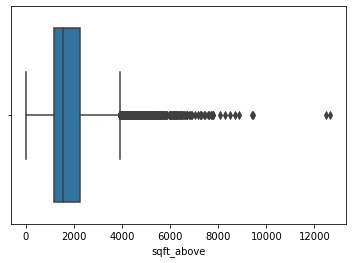

In [77]:
sns.boxplot(df_numerical['sqft_above']);

In [79]:
find_outlier_margin(df_numerical['sqft_above'])

[-455.0, 3905.0]

In [80]:
# get rid off outliers in sqft_above

p_s_s_no = price_no[price_no['sqft_above'] < 3905]
p_s_s_no

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_renovated
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,0
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,0
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,0
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,0
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,0
...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,0
30151,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,0
30152,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,0
30153,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,0


C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


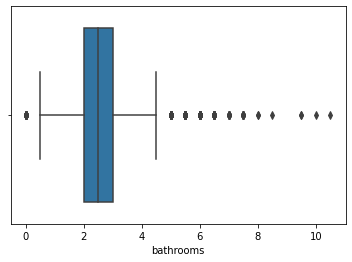

In [82]:
sns.boxplot(df_numerical['bathrooms']);

In [83]:
find_outlier_margin(df_numerical['bathrooms'])

[0.5, 4.5]

In [84]:
# get rid off outliers in bathroom

p_s_s_b_no = price_no[price_no['bathrooms'] < 5]
p_s_s_b_no

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_renovated
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,0
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,0
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,0
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,0
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,0
...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,0
30151,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,0
30152,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,0
30153,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,0


C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


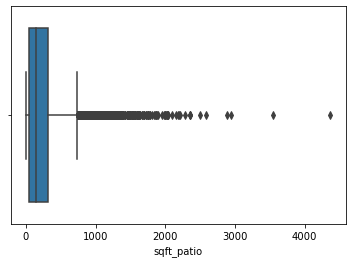

In [89]:
sns.boxplot(df_numerical['sqft_patio']);

In [90]:
find_outlier_margin(df_numerical['sqft_patio'])

[-380.0, 740.0]

In [93]:
# get rid off outliers in sqft_patio

p_s_s_b_s_no = price_no[price_no['sqft_patio'] < 740]

C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


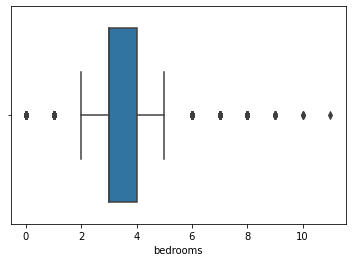

In [96]:
sns.boxplot(p_s_s_b_s_no['bedrooms']);

In [97]:
find_outlier_margin(df_numerical['bedrooms'])

[1.5, 5.5]

In [98]:
# get rid off outliers in bedrooms

p_s_s_b_s_b_no = price_no[(price_no['bedrooms'] < 6)
                       & (price_no['bedrooms'] >= 1)]

C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


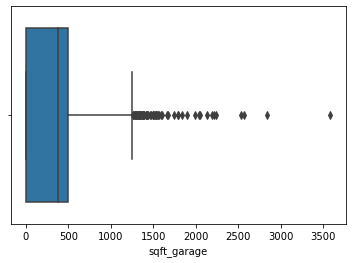

In [101]:
sns.boxplot(p_s_s_b_s_b_no['sqft_garage']);

In [102]:
find_outlier_margin(df_numerical['sqft_garage'])

[-765.0, 1275.0]

In [118]:
no_outliers = p_s_s_b_s_b_no[p_s_s_b_s_b_no['sqft_garage'] <1275]

C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


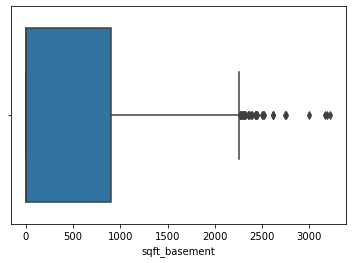

In [119]:
sns.boxplot(no_outliers['sqft_basement']);

In [120]:
find_outlier_margin(df_numerical['sqft_basement'])

[-1410.0, 2350.0]

In [121]:
no_outliers = no_outliers[no_outliers['sqft_basement'] <2350]

C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


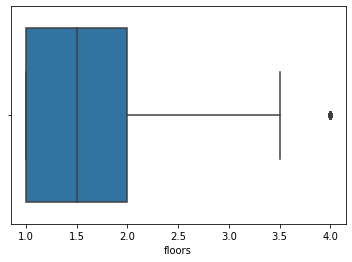

In [122]:
sns.boxplot(no_outliers['floors']);

In [123]:
find_outlier_margin(df_numerical['floors'])

[-0.5, 3.5]

In [124]:
no_outliers = no_outliers[no_outliers['floors'] < 4]

C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


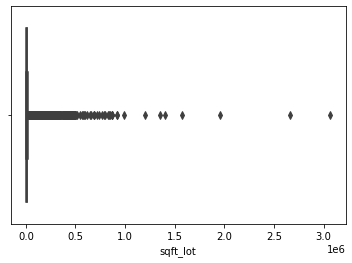

In [126]:
sns.boxplot(no_outliers['sqft_lot']);

In [127]:
find_outlier_margin(df_numerical['sqft_lot'])

[-3727.0, 19145.0]

In [128]:
no_outliers = no_outliers[no_outliers['floors'] < 19145]

In [130]:
# creating model with 4 numerical features

y = no_outliers['price']
X = no_outliers[['sqft_living', 'sqft_above', 'bathrooms', 'sqft_patio', 'bedrooms']]

num6_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
num6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     2641.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:26:33   Log-Likelihood:            -3.9002e+05
No. Observations:               27471   AIC:                         7.801e+05
Df Residuals:                   27465   BIC:                         7.801e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.69e+05   8975.353     41.115      0.000    3.51e+05    3.87e+05
sqft_living   310.7536      6.647     46.752      0.000     297.726     323.782
sqft_above     -6.7136      5.689     -1.180      0.238     -17.865       4.438
bathrooms    3.699e+04   4037.568      9.161      0.000    2.91e+04    4.49e+04
sqft_patio    111.1196     10.264     10.826      0.000      91.002     131.237
bedrooms    -4.131e+04   3323.086    -12.431      0.000   -4.78e+04   -3.48e+04
==============================================================================
Omnibus:                     1601.616   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2075.052
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       3.752   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

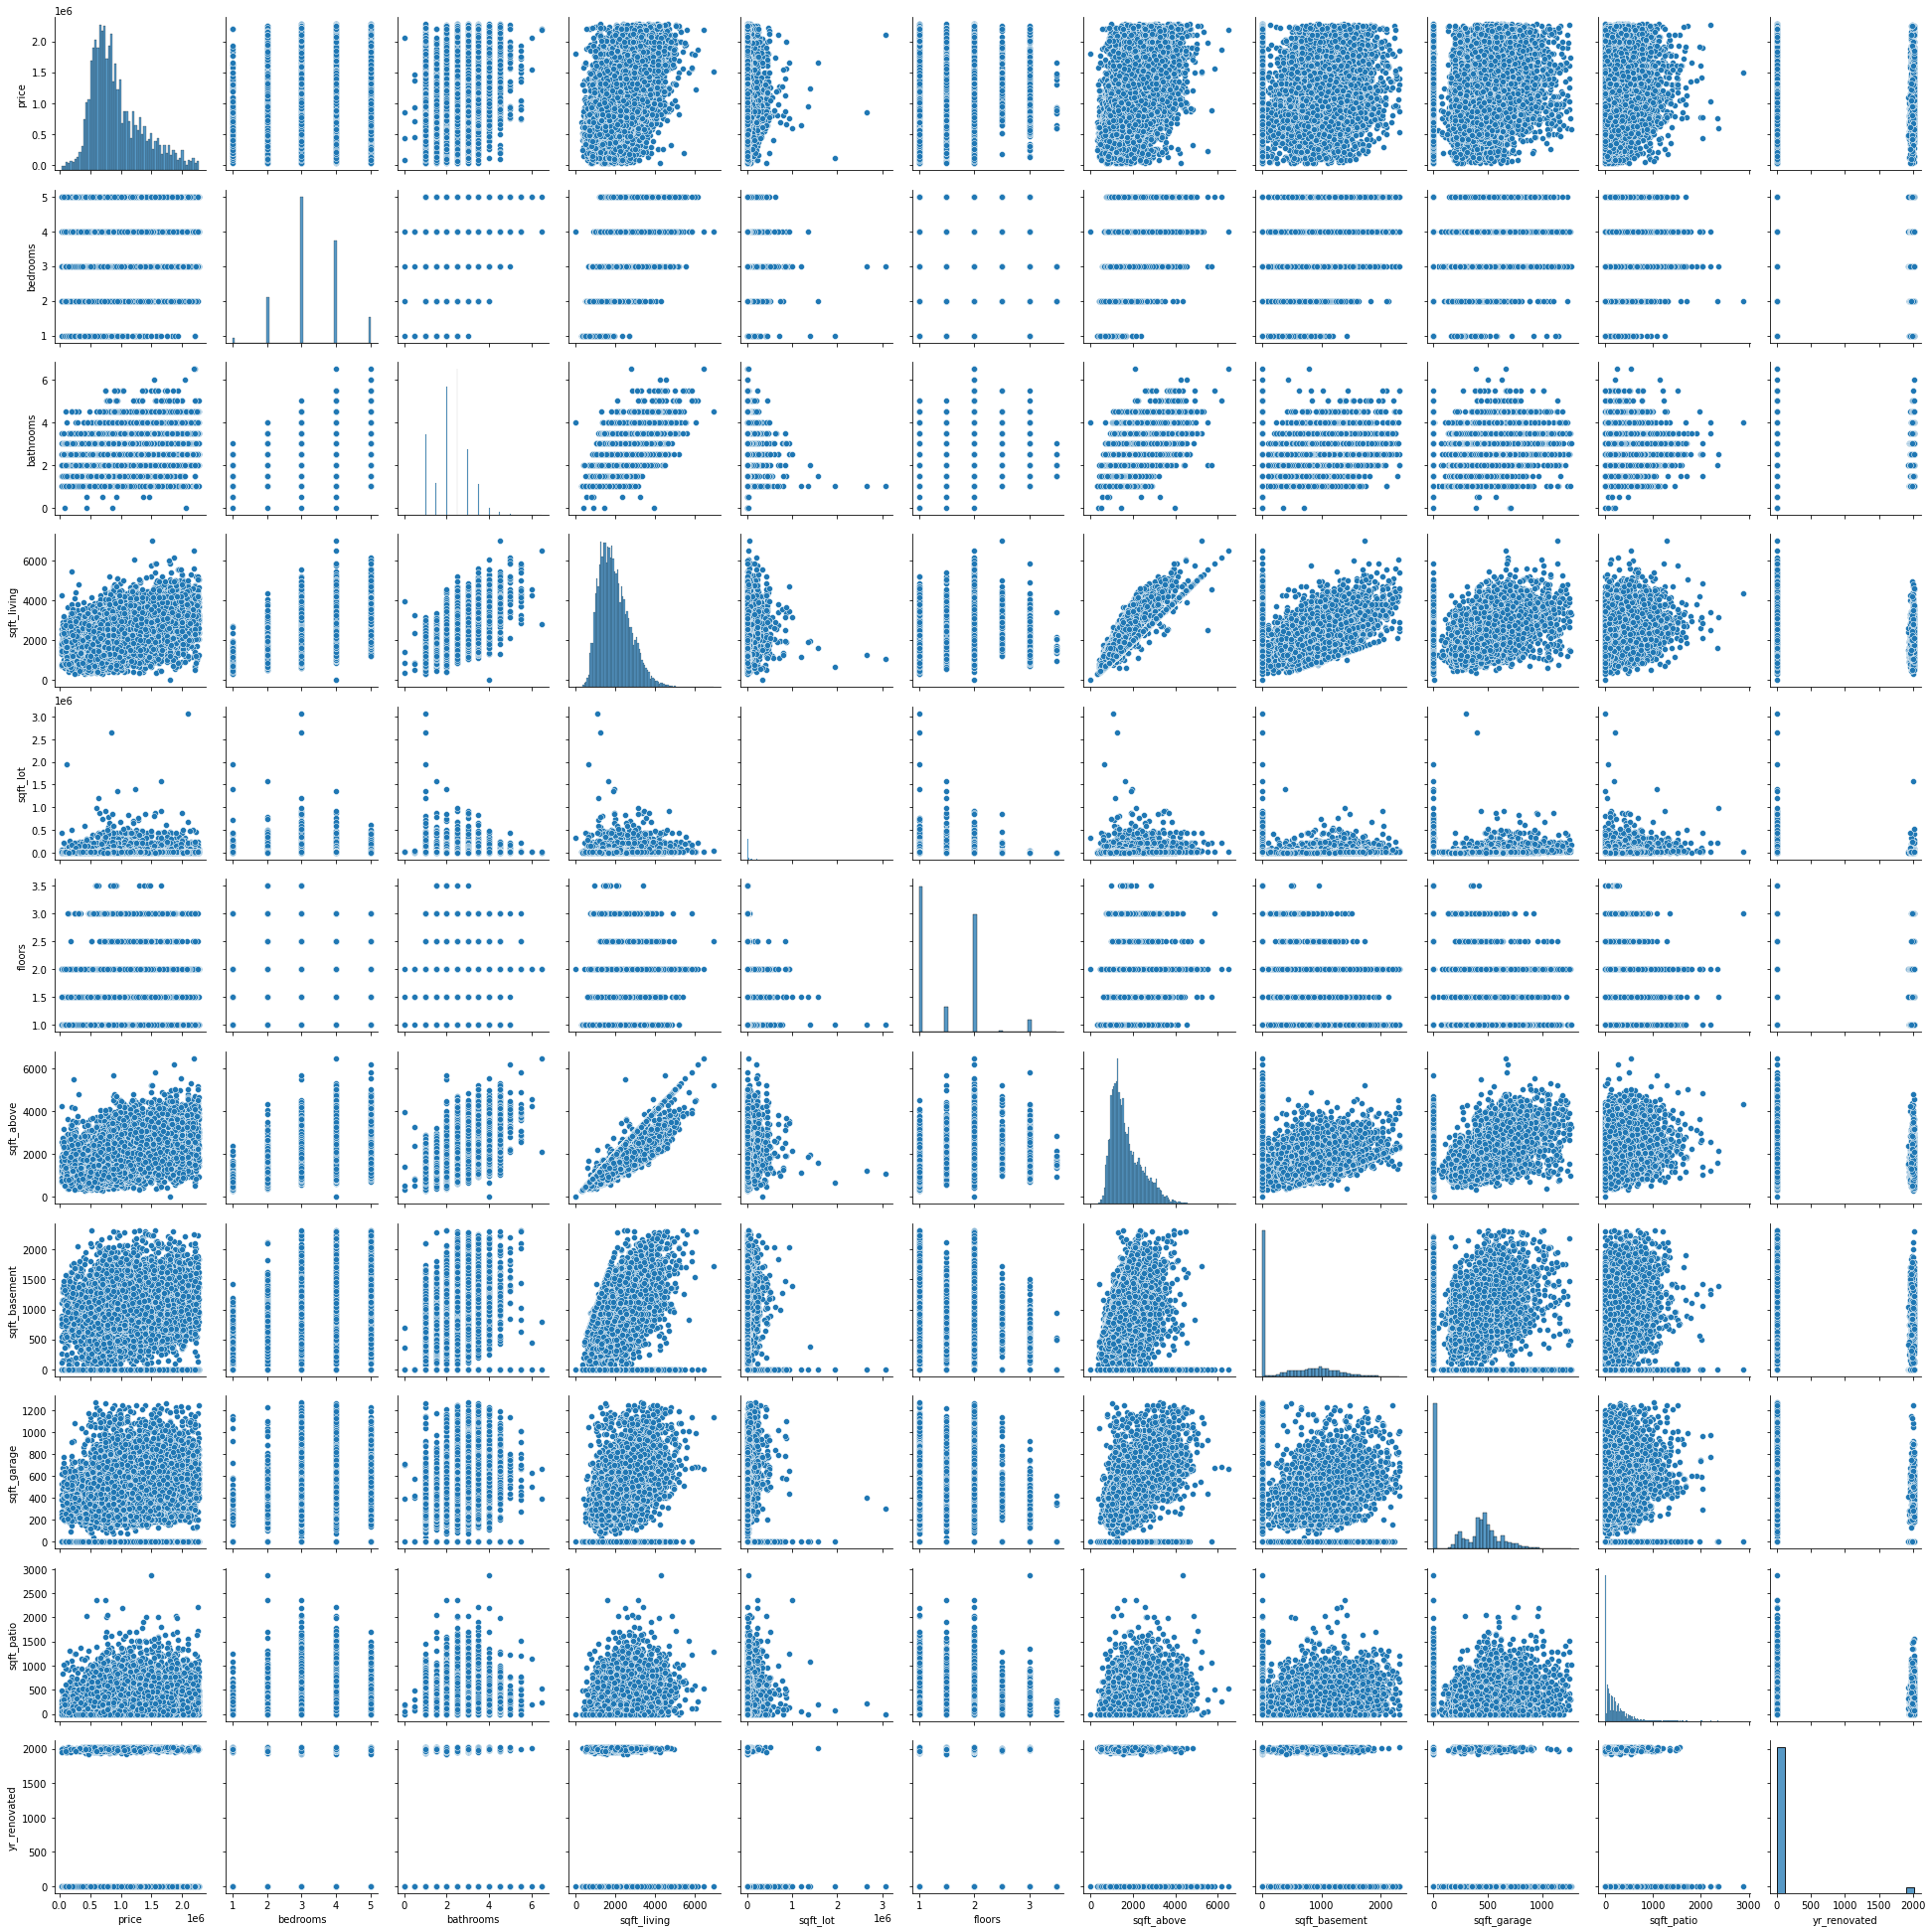

In [131]:
sns.pairplot(no_outliers);

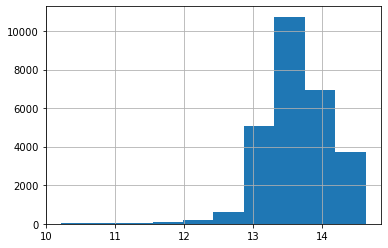

In [133]:
# Log-scaling can be a good tool to make right-skewed data more normal.
y_scld = np.log()
y_scld.hist();